# <center>Pfizer Vaccine Sentiment Analysis using Python

##### This project will use data from people opinions on *Twitter* to analyse their opinions towards the Pfizer vaccine

##### Let's start by importing the neccessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vaccination_tweets.csv")
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
[len(list(data.index)),len(list(data.columns))]

[8082, 16]

In [5]:
data.shape

(8082, 16)

In [6]:
data.ndim

2

##### Let's look at the null values contains in the data set.

In [7]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

##### To make things simple, let's drop the null rows

In [8]:
data = data.dropna()

In [9]:
data.shape

(4749, 16)

In [10]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

##### There is no null values again

In [11]:
list(data.columns)

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

##### Let's look at the descriptive statistics of the data

In [12]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,4.749000e+03,4.749000e+03,4749.000000,4749.000000,4749.000000,4749.000000
mean,1.355333e+18,5.069683e+04,1341.396926,14523.124447,1.545378,9.385555
std,1.280104e+16,3.545440e+05,3453.847283,36379.651961,13.395572,55.280915
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.344929e+18,1.740000e+02,215.000000,497.000000,0.000000,0.000000
50%,1.352030e+18,6.480000e+02,549.000000,2713.000000,0.000000,1.000000
75%,1.364940e+18,2.728000e+03,1419.000000,12258.000000,1.000000,5.000000
max,1.384788e+18,1.371493e+07,103226.000000,854011.000000,678.000000,1979.000000


##### The column that contains people opinions about pfizer vaccine is text.  
##### Let's see how it looks like.

In [14]:
print(data['text'])

0       Same folks said daikon paste could treat a cyt...
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...
6       it is a bit sad to claim the fame for success ...
9       #CovidVaccine \n\nStates will start getting #C...
10      while deaths are closing in on the 300,000 mar...
                              ...                        
8073    @narendramodi\n#5Qs 1146th set\nSir\nWud #fore...
8074    @CNBCTV18News @ShereenBhan WTF is this? Is he ...
8079    Second #PfizerBioNTech vaccine shot done! Than...
8080    Second #PfizerBioNTech vaccine is officially i...
8081    @mid_day #DGCI why not allow other proven Vacc...
Name: text, Length: 4749, dtype: object


##### There seems to be many special symbols and language errors that need to be corrected.  
##### So, let's apply these series of processings to the text column.

In [20]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\SAIBA
[nltk_data]     SAWADOGO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import os
os.getcwd()

'd:\\Dossier\\Self_Training\\Sofware\\GIT\\Sentiment-Analysis'

##### Let's define a processing function.

In [21]:
def clean(text):
    text = str(text).lower()
    text= re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

##### We then apply the function to the text column and replace it as a new column.

In [22]:
data['text'] = data['text'].apply(clean)

##### Let's print the column text again and see how it looks like.

In [23]:
print(data['text'])

0       folk said daikon past could treat cytokin stor...
2       coronavirus sputnikv astrazeneca pfizerbiontec...
6       bit sad claim fame success vaccin patriot comp...
9       covidvaccin state start get  monday us say pak...
10      death close  mark million peopl wait pfizerbio...
                              ...                        
8073      setsirwud foreign vaccin entri enrich aatman...
8074     shereenbhan wtf play ping pong game khelahob ...
8079    second pfizerbiontech vaccin shot done thank h...
8080    second pfizerbiontech vaccin offici 💉thank hon...
8081    midday dgci allow proven vaccin like pfizerbio...
Name: text, Length: 4749, dtype: object


##### As we can see, it looks pretty better now.

##### Now, let's perform a worcloud to see patterns

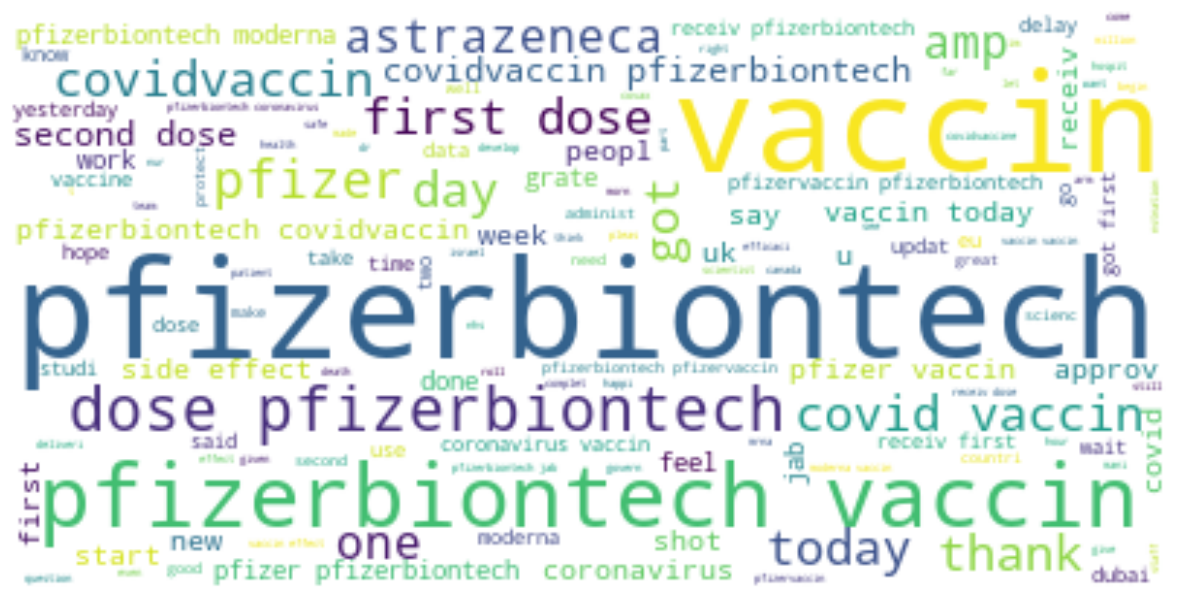

In [ ]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords = stopwords, background_color = "white").generate(text)
plt.figure( figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

##### Now let’s have a look at the word cloud of the hashtags column, which can show what kind of tags was trending when people were sharing their opinions about the Pfizer vaccine:

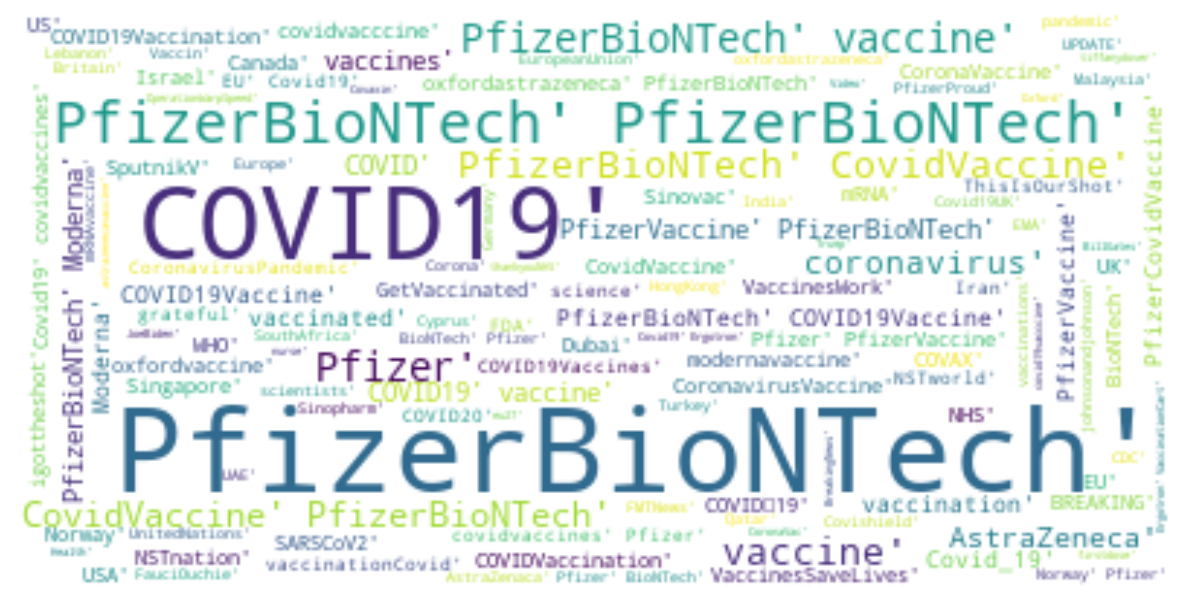

In [ ]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords = stopwords, background_color = "white").generate(text)
plt.figure( figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

##### The user_verified column in the dataset indicates whether the users who shared their opinions are verified by Twitter or not. A verified user on Twitter is a public figure or a celebrity.So, let's have a look at how many verified users do we have:

In [39]:
data.user_verified.value_counts()

False    4169
True      580
Name: user_verified, dtype: int64

##### The verified users represent 13.91% (580) of total users who shared their opinions about the pfizer vaccine.

##### Let's move now on the sentiment analysis task.  
##### We will create new columns based on the text column.We will had three columns as Positive, Negative and Neutral.

In [41]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]

[nltk_data] Downloading package vader_lexicon to C:\Users\SAIBA
[nltk_data]     SAWADOGO\AppData\Roaming\nltk_data...


In [42]:
data = data[["text", "Positive", "Negative", "Neutral"]]

In [43]:
data.head()

,text,Positive,Negative,Neutral
0,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000
6,bit sad claim fame success vaccin patriot comp...,0.353,0.166,0.481
9,covidvaccin state start get monday us say pak...,0.000,0.000,1.000
10,death close mark million peopl wait pfizerbio...,0.000,0.302,0.698


##### Now let's calculate how much of the people felt about the Pfizer vaccine:

In [44]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

##### Let's define a fuction that compute the sentiment.

In [45]:
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

##### We now call the function on x,y and z

In [46]:
sentiment_score(x, y, z)

Neutral 🙂 


##### So, most of the opinions are Neutral.  
##### Let's look at the total of each sentiment score before any conclusion.

In [53]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  417.81600000000003
Negative:  188.81200000000024
Neutral:  4142.3750000000055


In [52]:
#data.apply(lambda x: sentiment_score,x["Positive"],x["Negative"],x["Neutral"], axis=1)

##### The total of positive and negative is very less than Neutral, so we can say that the discussion of the Twitter users was about the awareness of the Pfizer vaccine rather than sharing its benefits or drawbacks.